In [1]:
import numpy as np
import pandas as pd

from ssrtcomputer import SSRTComputer

import matplotlib.pyplot as plt
import seaborn as sns

# Initialize an SSRTComputer instance

In [2]:
#set up variable names, init compy
var_dict = {
    'trialType_col': 'SS_trial_type',
    'SSD_col': 'SS_delay',
    'goRT_col': 'rt',
    'stopRT_col': 'rt',
    'go_key': 'go',
    'stop_key': 'stop',
    'block_col': 'current_block',
    'response_col': 'key_press',
    'corr_resp_col': 'correct_response',
}


compy = SSRTComputer(var_dict)

compy.view_params()

{'trialType_col': 'SS_trial_type',
 'SSD_col': 'SS_delay',
 'goRT_col': 'rt',
 'stopRT_col': 'rt',
 'go_key': 'go',
 'stop_key': 'stop',
 'block_col': 'current_block',
 'response_col': 'key_press',
 'corr_resp_col': 'correct_response',
 'acc_keys': (1, 0),
 'acc_col': 'accuracy',
 'alt_RT_cols': False}

# Single subject example, raw behavioral data

In [3]:
#load data, preprocess
eg_subj_file = 'example_data/stop_signal_single_task_network_A3QAHF4UUBM7ZO.csv'
eg_subj_df = pd.read_csv(eg_subj_file, index_col=0)
subj_df = compy.preprocess_data(eg_subj_df)

#calculate SSRT
print(compy.calc_SSRT(subj_df))
print(compy.calc_SSRT(subj_df, method='omission'))
print(compy.calc_SSRT(subj_df, method='integration'))
print(compy.calc_SSRT(subj_df, method='mean'))

282.6296296296296
282.6296296296296
279.6296296296296
301.53228449688623


# Group 1 examples

In [4]:
eg_group_file = 'example_data/stop_signal_single_task_network.csv'
eg_group_df = pd.read_csv(eg_group_file, index_col=0)
eg_group_df = eg_group_df.reset_index()
group_df = compy.preprocess_data(eg_group_df)

maxRT = compy.calc_max_RT(group_df) #setting shared max RT
print('maxRT:', maxRT)

maxRT: 1738.0


## using groupby and apply for fast and succinct computation

In [5]:
group_df.groupby('worker_id').apply(compy.calc_SSRT)

worker_id
A1DS5O8MSI3ZH0    191.583333
A1L1SQ488YCCFJ    231.666667
A1OSRAPSRT934Z    347.583333
A1R0689JPSQ3OF    250.166667
A1TS2SKXPX7ZED    255.500000
A1VCAMP3XM62R4    192.000000
A1YC558J4E5KZ     224.500000
A2581F7TDPAMBQ    282.000000
A2DWPP1KKAY0HG    274.000000
A2JI5RNPPXE8QE    189.333333
A2OFN0A5CPLH57    109.166667
A2S4YDJ9UGAXFQ    198.000000
A2SIKW18T2DYYW    189.916667
A2WYCY1FMQOD5F    276.833333
A2XUADP5L61HQ5    253.000000
A2YTO4EY3MNYAJ    271.333333
A37EV8RZ82WT8E    232.750000
A3G55RJTW3BSGM    247.500000
A3GEHH49HNJM57    199.000000
A3ISDIYTS02E8C    170.166667
A3IW9415ZOO0EX    289.166667
A3QAHF4UUBM7ZO    283.000000
A3QJJR5Y3XE92N    204.750000
A3V1ZYXBJYCIIE    254.083333
A55CXM7QR7R0N     264.583333
AD7CUW86FWEKT     209.166667
AIQT0DPRTXYYD     207.416667
AQJWO4YPR3LUQ     254.833333
AQL960O0LTRI8     181.666667
ASTR3EPUOKEXV     271.750000
AVJUIF9QHQRY8     239.833333
AVMIXXCHPD291     247.000000
AY7WPVKHVNBLG     235.666667
dtype: float64

# Building a Minimal Summary DF

In [6]:
compy.summarize(group_df, subj_col='worker_id', include_acc=False)

,go_RT,stop_RT,post_stop_slow,P(respond|signal),mean_SSD,SSRT_replacement
worker_id,,,,,,
A3QAHF4UUBM7ZO,594.726316,524.869565,19.428571,0.479167,300.000000,283.000000
AIQT0DPRTXYYD,723.885417,661.380952,-38.454545,0.437500,489.583333,207.416667
A3V1ZYXBJYCIIE,669.260417,625.680000,-60.000000,0.520833,422.916667,254.083333
A2WYCY1FMQOD5F,781.052083,712.600000,-36.266667,0.416667,479.166667,276.833333
A2S4YDJ9UGAXFQ,497.197917,444.833333,-5.500000,0.500000,275.000000,198.000000
A3G55RJTW3BSGM,503.694737,433.416667,-53.800000,0.500000,237.500000,247.500000
A1OSRAPSRT934Z,879.627660,743.240000,88.100000,0.520833,610.416667,347.583333
AVJUIF9QHQRY8,912.364583,810.476190,-28.000000,0.437500,654.166667,239.833333
A1VCAMP3XM62R4,598.625000,533.583333,-77.300000,0.500000,400.000000,192.000000


# Group 2 examples

### Intialize with keywords

In [7]:
ssrtc = SSRTComputer(SSD_col='StopSignalDelay', goRT_col='GoRT', stopRT_col='StopFailureRT',
                     corr_resp_col='CorrectResponse', block_col='Block')

In [8]:
# init ssrtc, load in data
eg_group2_file = 'example_data/DataFixedSSDs2.xlsx'
group2_df = pd.read_excel(eg_group2_file)
group2_df = group2_df.replace(r'^\s*$', np.nan, regex=True).replace('?', np.nan)

#build up "correct" responses for stop trials
addon_file = 'example_data/FixedSSD2StopTrialChoiceAccuracyInput.xlsx'
addon_df = pd.read_excel(addon_file)

group2_df['StopTrialCorrectResponse'] = np.nan

# circle response
for shape in ['Circle', 'Rhombus', 'Square', 'Triangle']:
    group2_df.loc[(group2_df['TrialType']=='stop') & (addon_df['Unnamed: 5']==f'{shape.lower()}.bmp'), 'StopTrialCorrectResponse'] = \
    addon_df.loc[(group2_df['TrialType']=='stop') & (addon_df['Unnamed: 5']==f'{shape.lower()}.bmp'), f'{shape}Response']


#combine go and stop into single columns
group2_df['response'] = np.where(group2_df['GoTrialResponse'].isnull(), group2_df['StopTrialResponse'], group2_df['GoTrialResponse'])
group2_df['CorrectResponse'] = np.where(group2_df['GoTrialCorrectResponse'].isnull(), group2_df['StopTrialCorrectResponse'], group2_df['GoTrialCorrectResponse'])
group2_df['CorrectResponse'] = group2_df['CorrectResponse'].str.lower()

group2_df = ssrtc.preprocess_data(group2_df)

## Building an Expanded Summary DF*
*Note this was a fixed SSD procedure, so the mean SSD will be constant across participants, and SSRT_mean will be directly proportional to go RT.


In [9]:
summary_df2 = ssrtc.summarize(group2_df, subj_col='Subject', SSRT_methods=['replacement', 'omission', 'integration', 'mean'], include_acc=True)
summary_df2

,go_RT,stop_RT,post_stop_slow,P(respond|signal),mean_SSD,go_corr_RT,go_ACC,stop_ACC,SSRT_replacement,SSRT_omission,SSRT_integration,SSRT_mean
Subject,,,,,,,,,,,,
1,482.294275,438.437788,10.151685,0.410985,250.0,483.197838,0.989834,0.995392,198.0,198.0,198.0,232.294275
10,423.640129,427.414141,-9.549296,0.750000,250.0,423.527933,0.962883,0.969697,210.0,210.0,209.0,173.640129
11,489.078778,453.883721,-5.574074,0.570076,250.0,491.054857,0.937835,0.963455,233.0,233.0,233.0,239.078778
12,403.433155,400.727520,-7.636364,0.695076,250.0,405.541011,0.951872,0.972752,176.0,176.0,176.0,153.433155
13,449.811028,446.721212,-11.920000,0.625000,250.0,449.654994,0.932548,0.939394,216.0,216.0,216.0,199.811028
14,434.849168,418.222591,0.490909,0.570076,250.0,437.089459,0.942029,0.930233,179.0,179.0,179.0,184.849168
15,591.225281,581.152000,35.317460,0.473485,250.0,586.661431,0.965730,0.980000,318.0,318.0,310.0,341.225281
16,346.472922,351.400000,-0.406250,0.852273,250.0,349.457011,0.929223,0.908889,180.0,180.0,179.0,96.472922
17,400.076389,391.364742,12.377358,0.623106,250.0,400.981768,0.966880,0.975684,161.0,161.0,161.0,150.076389


In [10]:
summary_df2.corr()

,go_RT,stop_RT,post_stop_slow,P(respond|signal),mean_SSD,go_corr_RT,go_ACC,stop_ACC,SSRT_replacement,SSRT_omission,SSRT_integration,SSRT_mean
go_RT,1.000000,0.971315,0.520335,-0.742953,NaN,0.999781,0.218449,0.284608,0.858107,0.858107,0.858617,1.000000
stop_RT,0.971315,1.000000,0.425301,-0.660954,NaN,0.968635,0.245727,0.319593,0.899797,0.899797,0.899769,0.971315
post_stop_slow,0.520335,0.425301,1.000000,-0.296217,NaN,0.525509,0.010292,0.065880,0.465321,0.465321,0.460410,0.520335
P(respond|signal),-0.742953,-0.660954,-0.296217,1.000000,NaN,-0.746632,-0.082468,-0.069175,-0.325490,-0.325490,-0.327373,-0.742953
mean_SSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
go_corr_RT,0.999781,0.968635,0.525509,-0.746632,NaN,1.000000,0.205178,0.273006,0.854747,0.854747,0.855432,0.999781
go_ACC,0.218449,0.245727,0.010292,-0.082468,NaN,0.205178,1.000000,0.956703,0.256587,0.256587,0.257617,0.218449
stop_ACC,0.284608,0.319593,0.065880,-0.069175,NaN,0.273006,0.956703,1.000000,0.368777,0.368777,0.369954,0.284608
SSRT_replacement,0.858107,0.899797,0.465321,-0.325490,NaN,0.854747,0.256587,0.368777,1.000000,1.000000,0.999644,0.858107
SSRT_omission,0.858107,0.899797,0.465321,-0.325490,NaN,0.854747,0.256587,0.368777,1.000000,1.000000,0.999644,0.858107


In [11]:
summary_df2.describe()

,go_RT,stop_RT,post_stop_slow,P(respond|signal),mean_SSD,go_corr_RT,go_ACC,stop_ACC,SSRT_replacement,SSRT_omission,SSRT_integration,SSRT_mean
count,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,472.334837,456.141351,9.944498,0.579467,250.0,473.028756,0.943613,0.946963,220.833333,220.833333,219.916667,222.334837
std,80.370972,69.818932,28.231446,0.148097,0.0,79.062167,0.037243,0.044578,55.904940,55.904940,55.085638,80.370972
min,346.472922,348.983229,-22.738562,0.339015,250.0,349.457011,0.817890,0.803333,153.000000,153.000000,152.000000,96.472922
25%,419.404225,403.171629,-6.089646,0.470170,250.0,420.222320,0.936513,0.929986,180.000000,180.000000,179.000000,169.404225
50%,445.268783,432.925965,2.755581,0.570076,250.0,446.351820,0.946699,0.963262,204.000000,204.000000,203.500000,195.268783
75%,527.494969,513.055000,14.426294,0.673769,250.0,526.848564,0.963595,0.975370,246.750000,246.750000,245.750000,277.494969
max,621.470174,581.152000,111.720721,0.903409,250.0,621.146410,0.989834,0.997135,339.000000,339.000000,336.000000,371.470174


# Recreating Figure 1b from Bissett, Jones, Poldrack & Logan (under review).*

*This example uses means and 95% CIs calculated internally in seaborn's lineplot function, not linear mixed effects modeling as in the paper.

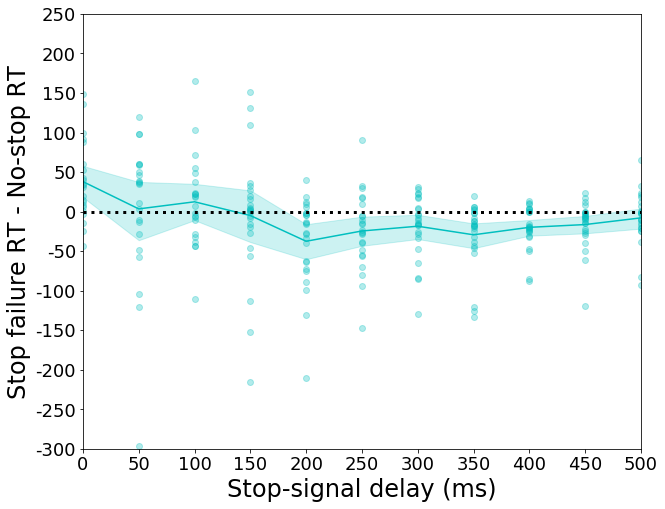

In [12]:
# Calculate - 1 line of code!
va_df = ssrtc.calc_group_violations(group2_df, subj_col='Subject')


# Pivot & Plot
pivot_df = va_df.pivot_table(values='mean_violation', index=['ssd'],
                        columns=['Subject'])


fig = plt.figure(figsize=(10,8))
plt.plot(pivot_df, linewidth=0, color='c', marker='o', alpha=.3, ) #plot individuals
ax = sns.lineplot(x='ssd', y="mean_violation", data=va_df, color='c')
ax.axis([0,500,-300,250])
ax.plot([0,pivot_df.index.max()],[0,0],color='k',linestyle=':',linewidth=3)

xticks=np.arange(0,pivot_df.index.max()+50,50)
xticks = [int(i) for i in xticks]
if len(xticks)> 16:
    xticks = [i for i in xticks if i%100==0]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize=18) 
yticks=np.arange(-300,250+50,50)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks,fontsize=18)

ax.set_xlabel('Stop-signal delay (ms)',fontsize=24)
_ = ax.set_ylabel('Stop failure RT - No-stop RT',fontsize=24) 
plt.show()
plt.close()